In [1]:
import requests #The requests module allows you to send HTTP requests using Python.

In [2]:
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [3]:
data = requests.get(standings_url)
data

<Response [200]>

In [4]:
from bs4 import BeautifulSoup

#allows us to parse the html. 
#It creates a parse tree for documents that can be used to extract data from HTML, which is useful for web scraping.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
soup = BeautifulSoup(data.text)

In [6]:
standings_table = soup.select('table.stats_table')[0] #css selector to select table with class name stats_table

In [7]:
standings_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2023-202491_overall"> <caption>Regular season Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Mat

In [8]:
links = standings_table.find_all('a') 
#in the standings table there is a link to every teams' results (the link is in the <a> tag)

In [9]:
links = [l.get('href') for l in links]

In [10]:
links = [l for l in links if '/squads/' in l]  #only want the links with /squads/ in it

In [11]:
links

['/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/e297cd13/Luton-Town-Stats',
 '/en/squads/943e8050/Burnley-Stats',
 '/en/squads/1df6b87e/Sheffield-United-Stats']

In [12]:
team_urls = [f"https://fbref.com{l}" for l in links] #create list of all the teams urls/links

In [13]:
team_urls

['https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/s

In [14]:
team_url = team_urls[0] # link to first team
team_url

'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats'

In [15]:
data = requests.get(team_url) # use requests to get link to first team's page 

In [16]:
import pandas as pd

matches = pd.read_html(team_url, match="Scores & Fixtures")

In [17]:
matches[0]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,NaN,NaN,45.0,81145.0,Martin Ødegaard,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,0.8,1.2,78.0,59984.0,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,2.0,1.0,53.0,24189.0,Martin Ødegaard,4-3-3,David Coote,Match Report,NaN
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,3.2,0.6,71.0,59961.0,Martin Ødegaard,4-3-3,Paul Tierney,Match Report,NaN
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,2.3,0.9,55.0,60192.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,1.0,0.3,74.0,39217.0,Martin Ødegaard,4-3-3,Simon Hooper,Match Report,NaN
6,2023-09-20,20:00,Champions Lg,Group stage,Wed,Home,W,4,0,nl PSV Eindhoven,2.3,0.5,58.0,58860.0,Martin Ødegaard,4-3-3,Felix Zwayer,Match Report,NaN
7,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,1.8,1.4,47.0,60156.0,Martin Ødegaard,4-3-3,Robert Jones,Match Report,NaN
8,2023-09-27,19:45,EFL Cup,Third round,Wed,Away,W,1,0,Brentford,NaN,NaN,60.0,16688.0,Jorginho,4-3-3,Darren Bond,Match Report,NaN
9,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,3.4,0.6,57.0,11193.0,Martin Ødegaard,4-3-3,Michael Salisbury,Match Report,NaN


In [18]:
soup = BeautifulSoup(data.text)

In [19]:
links = soup.find_all('a')

In [20]:
links = [l.get('href') for l in links]

In [21]:
links = [l for l in links if l and 'all_comps/shooting/' in l] #get link to shooting stats for team 

In [22]:
links

['/en/squads/18bb7c10/2023-2024/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions',
 '/en/squads/18bb7c10/2023-2024/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions',
 '/en/squads/18bb7c10/2023-2024/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions',
 '/en/squads/18bb7c10/2023-2024/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions']

In [23]:
link = f"https://fbref.com{links[0]}"
link

'https://fbref.com/en/squads/18bb7c10/2023-2024/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions'

In [24]:
data = requests.get(link)

In [25]:
shooting = pd.read_html(link, match="Shooting")[0]

In [26]:
shooting

For Arsenal                                                              \
          Date   Time              Comp                Round  Day    Venue   
0   2023-08-06  16:00  Community Shield  FA Community Shield  Sun  Neutral   
1   2023-08-12  12:30    Premier League          Matchweek 1  Sat     Home   
2   2023-08-21  20:00    Premier League          Matchweek 2  Mon     Away   
3   2023-08-26  15:00    Premier League          Matchweek 3  Sat     Home   
4   2023-09-03  16:30    Premier League          Matchweek 4  Sun     Home   
5   2023-09-17  16:30    Premier League          Matchweek 5  Sun     Away   
6   2023-09-20  20:00      Champions Lg          Group stage  Wed     Home   
7   2023-09-24  14:00    Premier League          Matchweek 6  Sun     Home   
8   2023-09-27  19:45           EFL Cup          Third round  Wed     Away   
9   2023-09-30  15:00    Premier League          Matchweek 7  Sat     Away   
10  2023-10-03  21:00      Champions Lg          Group stage  Tue     Away   
11  2023-10-08  16:30    Premier League          Matchweek 8  Sun     Home   
12  2023-10-21  17:30    Premier League          Matchweek 9  Sat     Away   
13  2023-10-24  21:00      Champions Lg          Group stage  Tue     Away   
14  2023-10-28  15:00    Premier League         Matchweek 10  Sat     Home   
15  2023-11-01  19:30           EFL Cup         Fourth round  Wed     Away   
16  2023-11-04  17:30    Premier League         Matchweek 11  Sat     Away   
17  2023-11-08  20:00      Champions Lg          Group stage  Wed     Home   
18  2023-11-11  15:00    Premier League         Matchweek 12  Sat     Home   
19  2023-11-25  17:30    Premier League         Matchweek 13  Sat     Away   
20  2023-11-29  20:00      Champions Lg          Group stage  Wed     Home   
21  2023-12-02  15:00    Premier League         Matchweek 14  Sat     Home   
22  2023-12-05  20:15    Premier League         Matchweek 15  Tue     Away   
23  2023-12-09  17:30    Premier League         Matchweek 16  Sat     Away   
24  2023-12-12  18:45      Champions Lg          Group stage  Tue     Away   
25  2023-12-17  14:00    Premier League         Matchweek 17  Sun     Home   
26  2023-12-23  17:30    Premier League         Matchweek 18  Sat     Away   
27  2023-12-28  20:15    Premier League         Matchweek 19  Thu     Home   
28  2023-12-31  14:00    Premier League         Matchweek 20  Sun     Away   
29  2024-01-07  16:30            FA Cup   Third round proper  Sun     Home   
30  2024-01-20  12:30    Premier League         Matchweek 21  Sat     Home   
31  2024-01-30  19:30    Premier League         Matchweek 22  Tue     Away   
32  2024-02-04  16:30    Premier League         Matchweek 23  Sun     Home   
33  2024-02-11  14:00    Premier League         Matchweek 24  Sun     Away   
34  2024-02-17  15:00    Premier League         Matchweek 25  Sat     Away   
35  2024-02-21  20:00      Champions Lg          Round of 16  Wed     Away   
36  2024-02-24  20:00    Premier League         Matchweek 26  Sat     Home   
37  2024-03-04  20:00    Premier League         Matchweek 27  Mon     Away   
38  2024-03-09  17:30    Premier League         Matchweek 28  Sat     Home   
39  2024-03-12  20:00      Champions Lg          Round of 16  Tue     Home   
40  2024-03-31  16:30    Premier League         Matchweek 30  Sun     Away   
41  2024-04-03  19:30    Premier League         Matchweek 31  Wed     Home   
42  2024-04-06  17:30    Premier League         Matchweek 32  Sat     Away   
43  2024-04-09  20:00      Champions Lg       Quarter-finals  Tue     Home   
44  2024-04-14  16:30    Premier League         Matchweek 33  Sun     Home   
45  2024-04-17  21:00      Champions Lg       Quarter-finals  Wed     Away   
46  2024-04-20  19:30    Premier League         Matchweek 34  Sat     Away   
47  2024-04-23  20:00    Premier League         Matchweek 29  Tue     Home   
48  2024-04-28  14:00    Premier League         Matchweek 35  Sun     Away   
49  2024-05-04  12:30    

In [27]:
#we have a multi level index above, which is not useful. We will make a single lvel index
shooting.columns = shooting.columns.droplevel()

In [28]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,...,19.1,0.0,0,0,0.8,0.8,0.06,1.2,1.2,Match Report
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,...,16.4,0.0,1,1,2.0,1.2,0.09,-1.0,-1.2,Match Report
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,...,13.8,0.0,1,1,3.2,2.4,0.14,-1.2,-1.4,Match Report
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,15.0,0.0,0,0,2.3,2.3,0.13,0.7,0.7,Match Report


In [29]:
#we now have two dataframes: matches and shooting. We want to merge these into one df called team_data
team_data = matches[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

In [30]:
team_data

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,...,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...,7,3,NaN,NaN,0,0
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,...,4-3-3,Michael Oliver,Match Report,NaN,15,7,19.1,0.0,0,0
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,...,4-3-3,David Coote,Match Report,NaN,13,2,16.4,0.0,1,1
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,...,4-3-3,Paul Tierney,Match Report,NaN,18,9,13.8,0.0,1,1
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,4-3-3,Anthony Taylor,Match Report,NaN,17,5,15.0,0.0,0,0
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,4-3-3,Simon Hooper,Match Report,NaN,13,4,17.4,0.0,0,0
6,2023-09-20,20:00,Champions Lg,Group stage,Wed,Home,W,4,0,nl PSV Eindhoven,...,4-3-3,Felix Zwayer,Match Report,NaN,18,8,14.4,0.0,0,0
7,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,...,4-3-3,Robert Jones,Match Report,NaN,12,4,16.9,0.0,1,1
8,2023-09-27,19:45,EFL Cup,Third round,Wed,Away,W,1,0,Brentford,...,4-3-3,Darren Bond,Match Report,NaN,10,3,NaN,NaN,0,0
9,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,...,4-3-3,Michael Salisbury,Match Report,NaN,13,6,15.5,0.0,2,2


In [33]:
team_data

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,...,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...,7,3,NaN,NaN,0,0
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,...,4-3-3,Michael Oliver,Match Report,NaN,15,7,19.1,0.0,0,0
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,...,4-3-3,David Coote,Match Report,NaN,13,2,16.4,0.0,1,1
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,...,4-3-3,Paul Tierney,Match Report,NaN,18,9,13.8,0.0,1,1
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,4-3-3,Anthony Taylor,Match Report,NaN,17,5,15.0,0.0,0,0
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,4-3-3,Simon Hooper,Match Report,NaN,13,4,17.4,0.0,0,0
6,2023-09-20,20:00,Champions Lg,Group stage,Wed,Home,W,4,0,nl PSV Eindhoven,...,4-3-3,Felix Zwayer,Match Report,NaN,18,8,14.4,0.0,0,0
7,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,...,4-3-3,Robert Jones,Match Report,NaN,12,4,16.9,0.0,1,1
8,2023-09-27,19:45,EFL Cup,Third round,Wed,Away,W,1,0,Brentford,...,4-3-3,Darren Bond,Match Report,NaN,10,3,NaN,NaN,0,0
9,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,...,4-3-3,Michael Salisbury,Match Report,NaN,13,6,15.5,0.0,2,2


['Manchester City', "Nott'ham Forest", 'Crystal Palace', 'Fulham', 'Manchester Utd', 'Everton', 'nl PSV Eindhoven', 'Tottenham', 'Brentford', 'Bournemouth', 'fr Lens', 'Manchester City', 'Chelsea', 'es Sevilla', 'Sheffield Utd', 'West Ham', 'Newcastle Utd', 'es Sevilla', 'Burnley', 'Brentford', 'fr Lens', 'Wolves', 'Luton Town', 'Aston Villa', 'nl PSV Eindhoven', 'Brighton', 'Liverpool', 'West Ham', 'Fulham', 'Liverpool', 'Crystal Palace', "Nott'ham Forest", 'Liverpool', 'West Ham', 'Burnley', 'pt Porto', 'Newcastle Utd', 'Sheffield Utd', 'Brentford', 'pt Porto', 'Manchester City', 'Luton Town', 'Brighton', 'de Bayern Munich', 'Aston Villa', 'de Bayern Munich', 'Wolves', 'Chelsea', 'Tottenham', 'Bournemouth']


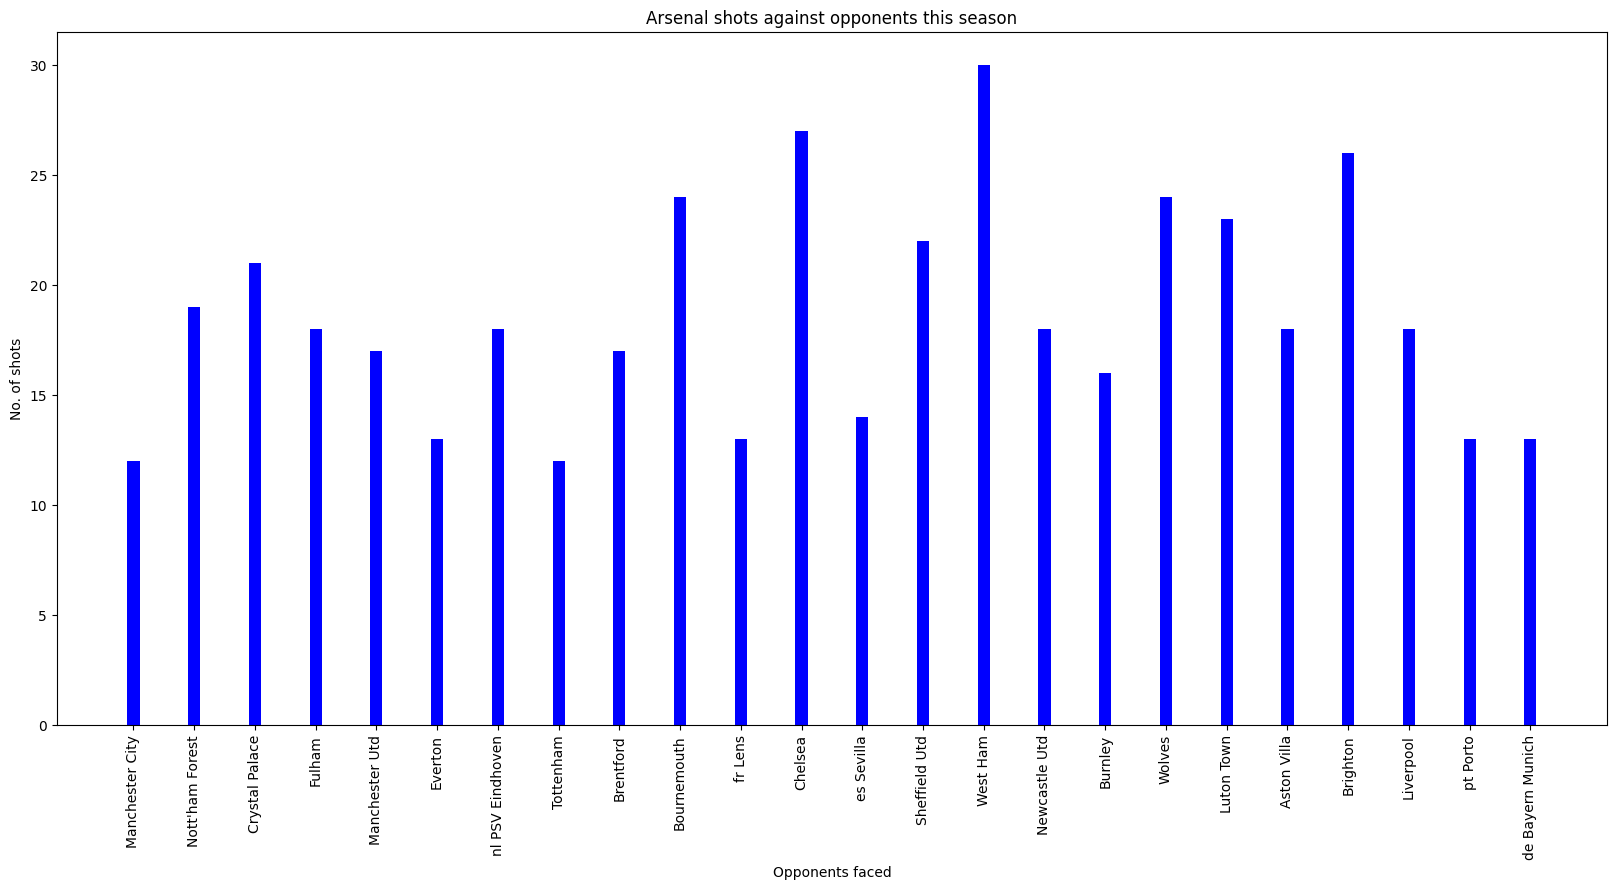

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
opponents = list(team_data["Opponent"])
print(opponents)
shots = list(team_data["Sh"].values)
  
fig = plt.figure(figsize = (20,9))
 
# creating the bar plot
plt.bar(opponents, shots, color ='blue', 
        width = 0.2)
 
plt.xlabel("Opponents faced")
plt.xticks(rotation=90)
plt.ylabel("No. of shots")
plt.title("Arsenal shots against opponents this season")
plt.show()

In [35]:
#lets scale this method up!
#get the data for multiple teams for multiple seasons, not just one team for one season..
#get the data for the last 3 seasons
years = list(range(2024, 2021, -1))

In [36]:
years

[2024, 2023, 2022]

In [37]:
all_matches = []

In [38]:
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [39]:
import time
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0] #css selector to select table with class name stats_table

    links = [l.get('href') for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]  #only want the links with /squads/ in it
    team_urls = [f"https://fbref.com{l}" for l in links] #create list of all the teams urls/links

    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com/{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", "")

        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

        soup = BeautifulSoup(data.text)
        links = [l.get('href') for l in soup.find_all("a")]
        links = [l for l in links if l and 'all_comps/shooting/' in l] #get link to shooting stats for team 
        link = f"https://fbref.com{links[0]}"
        data = requests.get(link)
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()

        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue

        team_data = team_data[team_data["Comp"] == "Premier League"]
        team_data["Season"] = year #adding season column
        team_data["Team"] = team_name #adding team collumn
        all_matches.append(team_data)
        time.sleep(1)

C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_32412\392000582.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_32412\392000582.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]
C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_32412\392000582.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_32412\392000582.py:25: FutureWarni

In [51]:
match_df = pd.concat(all_matches)

In [52]:
match_df.columns = [c.lower() for c in match_df.columns]

In [53]:
match_df.to_csv("matches.csv")

In [55]:
#match_df = match_df[(match_df['team'] == "Arsenal")]
#match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,2022-05-01,16:30,Premier League,Matchweek 35,Sun,Away,W,2,1,West Ham,...,Match Report,NaN,13.0,7.0,19.3,0.0,0,0,2022,Arsenal
41,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,W,2,1,Leeds United,...,Match Report,NaN,19.0,9.0,14.3,2.0,0,0,2022,Arsenal
42,2022-05-12,19:45,Premier League,Matchweek 22,Thu,Away,L,0,3,Tottenham,...,Match Report,NaN,9.0,5.0,24.0,0.0,0,0,2022,Arsenal
43,2022-05-16,20:00,Premier League,Matchweek 37,Mon,Away,L,0,2,Newcastle Utd,...,Match Report,NaN,11.0,2.0,21.1,0.0,0,0,2022,Arsenal
